<a href="https://colab.research.google.com/github/Hazim-HF/Project2DataScience/blob/main/P152419_Project2_STQD6014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
# Hazim Fitri Bin Ahmad Faudzi (P152419)
# Data Science (STQD6014)
# Dr Bernard Lee Kok Bang
---



# 1. Introduction
Nowadays, understanding of socio-economic factors that influence the income level has become more important for policymakers and business.
This project aims to derive insights from Adult dataset which is from the UCI Machine Learning Repository.This project will visualize important aspect that will give deeper insight to stakeholder to make sure they can make data-driven decision making.

# 2. Dataset Background
Adult dataset also known as census income dataset is data extracted by Barry Becker from the 1994 Census.This data is available in the UCI Machine Learning Repository. This data has various feature of adult such as age, education, marital status, and so on. The main is famous for machine learning and data mining as it can be used for task such as classification and regression. This data often used to develop predictive modelling to predict whether an individual earns more than $50,000 or not. The data contains 48,842 line of data and have 14 attributes in the dataset. Link to the data [Census Income](https://archive.ics.uci.edu/dataset/20/census+income) A short overview of the data is as below:

- **Age**: Continuous.
- **Workclass**: Categorical (e.g., Private, Self-emp-not-inc, etc.).
- **Education**: Categorical (e.g., Bachelors, Some-college, etc.).
- **Education-num**: Continuous (Number of years of education).
- **Marital-status**: Categorical (e.g., Married-civ-spouse, Divorced, etc.).
- **Occupation**: Categorical (e.g., Tech-support, Craft-repair, etc.).
- **Relationship**: Categorical (e.g., Wife, Own-child, etc.).
- **Race**: Categorical (e.g., White, Black, etc.).
- **Sex**: Categorical (Male or Female).
- **Capital-gain**: Continuous.
- **Capital-loss**: Continuous.
- **Hours-per-week**: Continuous.
- **Native-country**: Categorical (e.g., United States, Mexico, etc.).

# 3. Problem Statement

For this project, the main problem that is to be addressed is:

1. What is the majority of workclass that earns more than $50,000 per year

2. Does higher education level contributes to higher earnings

3. Does older age earns higher earnings

4. Which marital status earns higher than $50,000

5. Does longer working hours means longer

# 4. Loading Data

In [ ]:
pip install ucimlrepo

Import necessary library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

df = pd.concat([X, y], axis=1)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# 5. Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# 6. Data Cleaning


## 6.1. Check for missing values

In [ ]:
print(f"Total missing values in the dataset: {df.isnull().sum().sum()}")
print(f"Total missing values in each column: {df.isnull().sum()}")

Total missing values in the dataset: 2203
Total missing values in each column: age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


We can see that there are several feature with missing values. When imputing missing values, the most basic approach is to impute the missing values using central tendencies. For categorical variable, we can use mode and for numerical variable, we can use mean or median depending on the variables.

In [ ]:
print(df['workclass'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


We can see that there are missing data which is denoted by '?' instead of null value. Thus, we will clean the data by replacing with all the '?' with the mode of the data.

In [ ]:
df['workclass'] = df['workclass'].str.replace('?', df['workclass'].mode()[0], regex=False)

Now, we need to make sure that the data does not have any human error'?'

In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked', nan],
      dtype=object)

Below is the method used for the data imputation.

In [ ]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

<ipython-input-64-217bf3e9b35b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
<ipython-input-64-217bf3e9b35b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

Now, we need to double check that we've impute all the missing values in the dataset.

In [ ]:
print(f"Total missing values in the dataset after imputation: {df.isnull().sum().sum()}")
print(f"Total missing values in each columns after imputation:")
print(df.isnull().sum())

Total missing values in the dataset after imputation: 0
Total missing values in each columns after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Next, we double check will other catogorical variable

In [ ]:
print(df['education'].unique())

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


In [ ]:
print(df['marital-status'].unique())

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


## 6.2. Remove duplicate

In [ ]:
print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 0


In [ ]:
df = df.drop_duplicates(subset=None, keep='first')

In [ ]:
print(f'Number of duplicated rows after dropping duplicates: {df.duplicated().sum()}')

Number of duplicated rows after dropping duplicates: 0


## 6.3. Handle outliers

<ipython-input-31-68169a49f52c>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[['age','hours-per-week']],


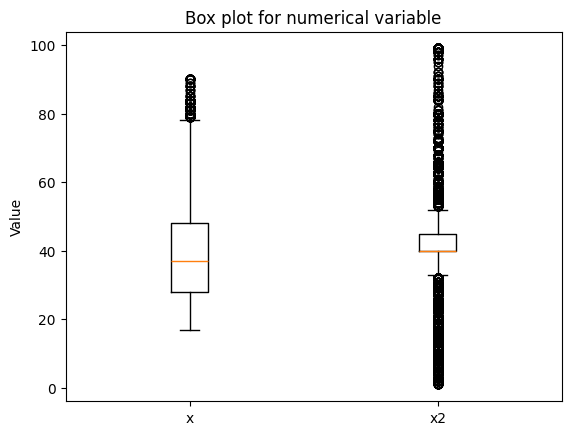

In [ ]:
plt.boxplot(df[['age','hours-per-week']],
            labels=['x','x2'])
plt.title('Box plot for numerical variable')
plt.ylabel('Value')
plt.show()

In [ ]:
var = ['age', 'hours-per-week']
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

print('\nFiltered Data (Outliers Removed):')
print(df.shape)


Filtered Data (Outliers Removed):
(48469, 15)


<ipython-input-37-9efae047b16b>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[['age','hours-per-week']],


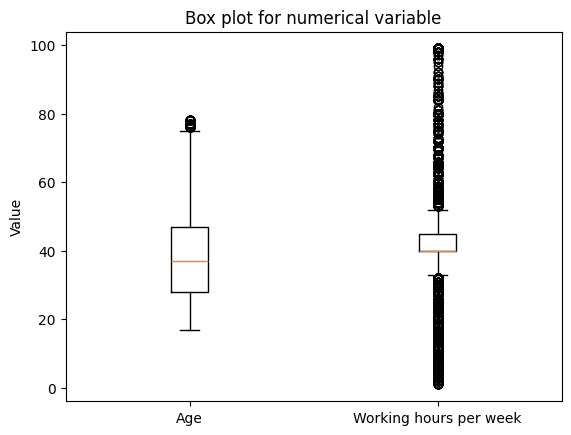

In [ ]:
plt.boxplot(df[['age','hours-per-week']],
            labels=['Age','Working hours per week'])
plt.title('Box plot for numerical variable')
plt.ylabel('Value')
plt.show()

## 6.4. Handling variable

In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
df['income'] = df['income'].str.replace('.', '', regex=False)
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

# 7. Data Visualization

## 7.1. Pie Chart: Distribution of workclass

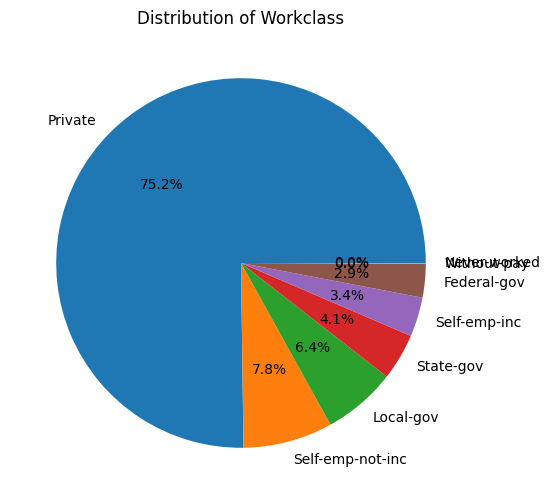

In [ ]:
plt.figure(figsize=(8, 6))
df['workclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Workclass')
plt.ylabel('')
plt.show()

This pie chart shows the distribution of different work classes among the individuals in the dataset. It helps in understanding the variety of work categories represented.

## 7.2. Bar Plot: Education Level vs. Income

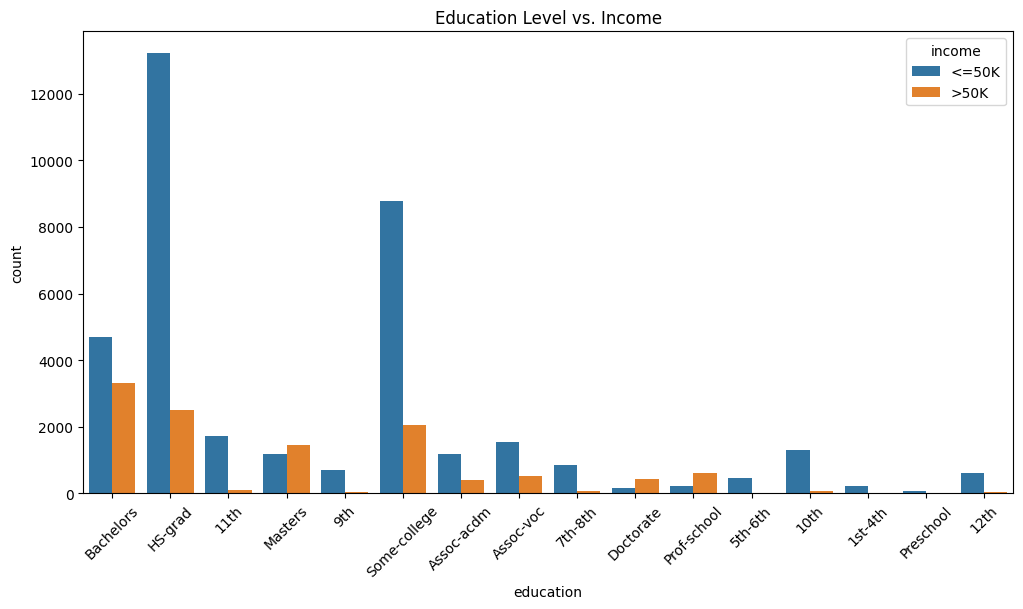

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income')
plt.title('Education Level vs. Income')
plt.xticks(rotation=45)
plt.show()

The bar plot displays the count of individuals by their education level and their income category (\<= \$50K and \> \$50K). It illustrates which educational backgrounds are more prevalent in each income category.

## 7.3. Box Plot: Age Distribution by Income

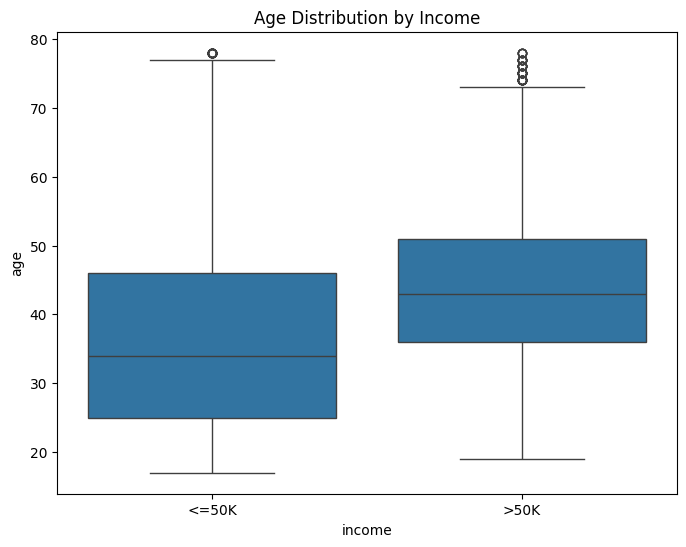

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='income', y='age')
plt.title('Age Distribution by Income')
plt.show()

The box plot shows the distribution of ages for individuals in each income category. This helps in understanding the age range and medians for both income groups.

## 7.4. Count Plot: Marital Status Count

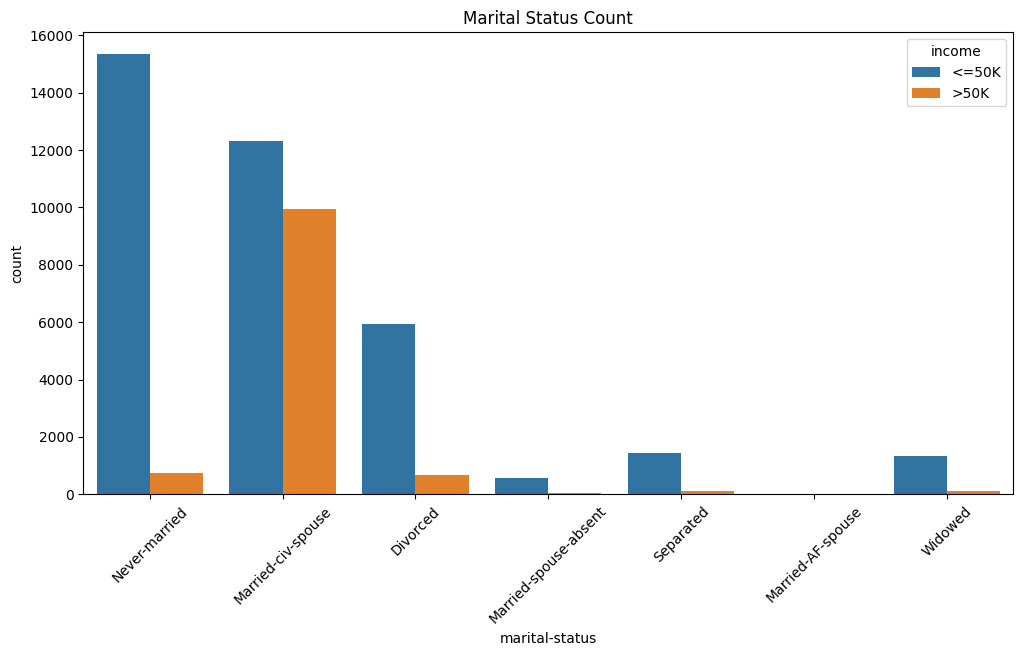

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='marital-status', hue = 'income')
plt.title('Marital Status Count')
plt.xticks(rotation=45)
plt.show()

The count plot shows the frequency of different marital statuses in the dataset. It's useful for visualizing the most common marital statuses among individuals.

## 7.5. Histogram: Hours per Week Distribution

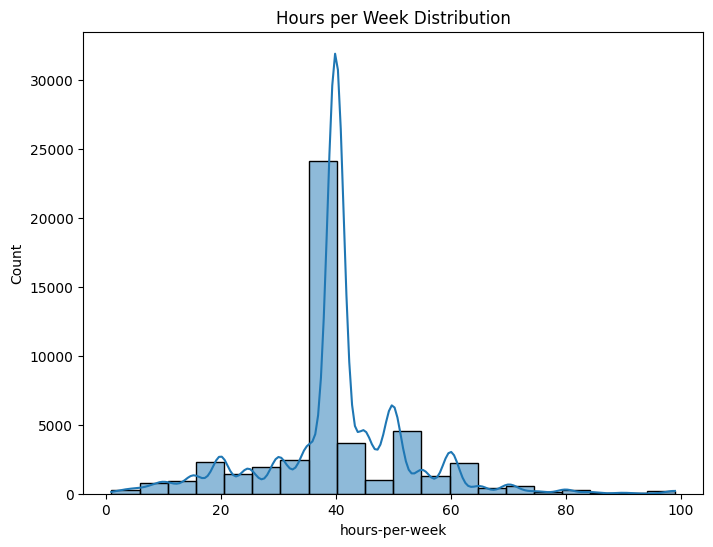

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='hours-per-week', bins=20, kde=True)
plt.title('Hours per Week Distribution')
plt.show()

This histogram displays the distribution of hours per week worked by the individuals. The kernel density estimate (KDE) line provides a smoothed distribution curve.

# 8. Conclusion

The majority of individuals are employed in the private sector (\~70.5%), with self-employed and government workers comprising the rest of the distribution. This underscores the significant role of private sector employment in the dataset.

Higher education levels, such as Bachelor's and Master's degrees, are associated with higher income levels. Individuals with higher education often have better job opportunities, leading to increased earning potential. This aligns with broader trends observed in labor statistics.

Older individuals tend to earn more, with the median age higher for those earning more than \$50K. This finding suggests that income often increases with age due to accumulated experience and career progression.

The most common marital statuses are "Married-civ-spouse" and "Never-married." Marital status can influence household income dynamics, especially for married individuals who might have dual-income households.

Most individuals work around 40 hours per week, with a significant peak around this mark. Full-time employment is standard, but some individuals work significantly more or less, impacting their income.

